In [19]:
from cluster_sf.integrals import eps, W
from cluster_sf.constants import center_coord, angular_scale, kmin, kmax
from astropy.table import Table
import argparse
from cluster_sf.bins import make_bins
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
sys.argv = [""]

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument("prefix", type=str)
parser.add_argument("--edgesfile", type=str)

args = parser.parse_args(["two_pts"])

prefix = args.prefix
edgesfile = args.edgesfile
regfile = f"{prefix}.reg"
if edgesfile is None:
    edges = None
else:
    edges = np.loadtxt(edgesfile)


In [4]:
regs, seps, bins, bin_idxs, bins_used, edges = make_bins(regfile, edges=edges)


num_seps =  10  len_bins =  10


In [5]:
radii = np.array(
    [
        reg.center.separation(center_coord).to_value("arcmin") * angular_scale.value
        for reg in regs
    ]
)
widths = np.array([(reg.width*angular_scale).to_value("Mpc") for reg in regs])

In [6]:
k_bins = np.linspace(kmin, kmax, 1001)
kmid = 0.5*(k_bins[1:]+k_bins[:-1])

In [7]:
kmid

array([2.5000e-02, 7.5000e-02, 1.2500e-01, 1.7500e-01, 2.2500e-01,
       2.7500e-01, 3.2500e-01, 3.7500e-01, 4.2500e-01, 4.7500e-01,
       5.2500e-01, 5.7500e-01, 6.2500e-01, 6.7500e-01, 7.2500e-01,
       7.7500e-01, 8.2500e-01, 8.7500e-01, 9.2500e-01, 9.7500e-01,
       1.0250e+00, 1.0750e+00, 1.1250e+00, 1.1750e+00, 1.2250e+00,
       1.2750e+00, 1.3250e+00, 1.3750e+00, 1.4250e+00, 1.4750e+00,
       1.5250e+00, 1.5750e+00, 1.6250e+00, 1.6750e+00, 1.7250e+00,
       1.7750e+00, 1.8250e+00, 1.8750e+00, 1.9250e+00, 1.9750e+00,
       2.0250e+00, 2.0750e+00, 2.1250e+00, 2.1750e+00, 2.2250e+00,
       2.2750e+00, 2.3250e+00, 2.3750e+00, 2.4250e+00, 2.4750e+00,
       2.5250e+00, 2.5750e+00, 2.6250e+00, 2.6750e+00, 2.7250e+00,
       2.7750e+00, 2.8250e+00, 2.8750e+00, 2.9250e+00, 2.9750e+00,
       3.0250e+00, 3.0750e+00, 3.1250e+00, 3.1750e+00, 3.2250e+00,
       3.2750e+00, 3.3250e+00, 3.3750e+00, 3.4250e+00, 3.4750e+00,
       3.5250e+00, 3.5750e+00, 3.6250e+00, 3.6750e+00, 3.7250e

In [8]:
sky_funcs = {}
for key, idxs in bin_idxs.items():
    func = 0.0
    print(key, idxs)
    for i, j in idxs:
        #print(eps(kmid, radii[i])*W(kmid, widths[i])-eps(kmid, radii[j])*W(kmid, widths[j]))
        #func += (eps(kmid, radii[i])*W(kmid, widths[i])-eps(kmid, radii[j])*W(kmid, widths[j]))**2
        func += (eps(kmid, radii[i])-eps(kmid, radii[j]))**2
    func /= len(idxs)
    sky_funcs[key] = func
 

0 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
1 [(0, 4), (1, 4), (2, 4), (3, 4)]


In [9]:
sky_funcs2 = {}
for key, idxs in bin_idxs.items():
    func = 0.0
    print(key, idxs)
    for i, j in idxs:
        #print(eps(kmid, radii[i])*W(kmid, widths[i])-eps(kmid, radii[j])*W(kmid, widths[j]))
        func += (eps(kmid, radii[i])*W(kmid, widths[i])-eps(kmid, radii[j])*W(kmid, widths[j]))**2
        #func += (eps(kmid, radii[i])-eps(kmid, radii[j]))**2
    func /= len(idxs)
    sky_funcs2[key] = func
 

0 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
1 [(0, 4), (1, 4), (2, 4), (3, 4)]


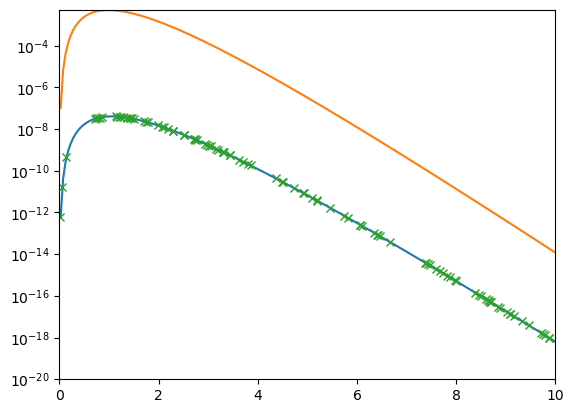

In [27]:
plt.figure()
plt.plot(kmid, sky_funcs[0])
plt.plot(kmid, sky_funcs[1])
plt.xlim(0, 10)
plt.ylim(1.0e-20, None)
f = InterpolatedUnivariateSpline(kmid, sky_funcs[0])
plt.plot(x, np.interp(x, kmid, sky_funcs[0]), 'x')
plt.yscale("log")

In [11]:
t1 = Table({"radii": radii, "widths": widths})
t1.write(f"{prefix}_radii_widths.dat", format="ascii.commented_header", overwrite=True)
t2_dict = {"k": kmid}
t2_dict.update({f"bin_{k}": v for k, v in sky_funcs.items()})
t2 = Table(t2_dict)
t2.write(f"{prefix}_sf_sky_funcs.dat", format="ascii.commented_header", overwrite=True)

In [24]:
x = np.sort(np.random.uniform(size=100, low=0, high=10))

In [25]:
f(x)

array([-5.80528555e-12,  6.57859736e-12,  4.02405772e-10,  3.15911477e-08,
        3.29523558e-08,  3.47028689e-08,  3.59437463e-08,  3.80042422e-08,
        4.05325182e-08,  4.02027511e-08,  3.90651662e-08,  3.90138152e-08,
        3.75704694e-08,  3.58158997e-08,  3.35820141e-08,  3.34255662e-08,
        3.23441379e-08,  3.06793402e-08,  2.35890615e-08,  2.21085541e-08,
        2.13920771e-08,  1.51341519e-08,  1.29119239e-08,  1.21715061e-08,
        1.04858502e-08,  8.46922343e-09,  8.28326284e-09,  5.26350702e-09,
        5.17668731e-09,  3.28799795e-09,  3.22260766e-09,  3.15977376e-09,
        2.86068983e-09,  2.02232116e-09,  1.79772025e-09,  1.60885194e-09,
        1.46945353e-09,  1.15012218e-09,  1.01459427e-09,  8.14220299e-10,
        7.92672728e-10,  7.60461794e-10,  5.54385364e-10,  5.48362316e-10,
        3.34787132e-10,  2.78586190e-10,  2.09631851e-10,  1.79585619e-10,
        4.27465557e-11,  2.94520319e-11,  2.86878130e-11,  1.48097189e-11,
        8.65672685e-12,  

In [28]:
np.interp(0.0, kmid, sky_funcs[0])

np.float64(6.392627211615869e-13)